In [ ]:
## DATA CLEANING AND TRANSFORMATION 

## DATA SET OF 100 ROWS ( MESSY DATA )

## TOOL USE 1) PANDAS , MATPLOTLIB , SEABORN 


In [ ]:
# ## CONCEPTS 

# 1) LOADING THE DATA    -> WHAT DATA WE HAVE AND WHAT TO PROCESS WITH 
# 2) MISSING VALUE   ->   EMPTY EMAILS , AGES , QUNTITY 
# 3) DUPLICATES ROWS -> SAME CUSTOJMER THAT APPEAR TWICE 
# 4) STRING WHITESPACE   -> TRAILING SPACES IN NAMES 
# 5) CASE NORMALIZATION.   ->  MALE , M , F , FEMALE 
# 6) PRICE COLUMN CLEANING. -> 400 ? $400 
# 7) OUTLIER.  -> -5 WITH AGE 
# 8) EMAIL VALIDATION 
# 9) FEATURE ENGINEERING  

In [1]:
# ## LIBRARIES TO USED 

# 1) PANDAS 
# 2) NUMPY 
# 3) MATPLOTLIB 
# 4) SEABORN 
# 6) WARNING. 

In [16]:
## importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import warnings



warnings.filterwarnings('ignore')

## display setting 

pd.set_option('display.max_column',None ) ## this is the way to see all the columns 
pd.set_option('display.max_rows',20)
pd.set_option('display.float_format','{:.2f}'.format)


## set a visual theme for all ypur charts 

plt.style.use('dark_background')
sns.set_palette("bright")


print("All the libs are imported properly ")
print (f" Pandas Version :: {pd.__version__}")
print(f" Numpy Version : {np.__version__}")


All the libs are imported properly 
 Pandas Version :: 2.0.1
 Numpy Version : 1.24.0


In [ ]:
## loading the data set 

## pd.read_csv ()  most common fucntion that we use to load the data set 

# pd.read_file(filepath)

# filepath -> path of the csv 
# dtype = str  

In [8]:
## Loading the data set 

df_raw = pd.read_csv('/Users/kuldeeprajgour/Documents/ETL/DataCleaning/intermediate_customer_orders_messy_100_rows_v2.csv', dtype=str  )


## always make a copy for the orignal csv and work on it 

df = df_raw.copy() 

print(f"Data set is loaded ")
print(f"Shape :{df.shape[0]}rows * {df.shape[1]} columns")

Data set is loaded 
Shape :100rows * 12 columns


In [9]:
## check the initial rows 

print("-- Printing the first few rows --")

df.head(5)

-- Printing the first few rows --


,CustomerID,FullName,Email,Gender,Age,Country,SignupDate,LastPurchaseDate,Product,Quantity,Price,PaymentMethod
0,C001,Sarah Thomas,NaN,Female,20.0,U.S.A,01/27/2023,15-07-2023,Headphones,2,$400,Credit Card
1,C002,John White,john.white@email.com,Female,NaN,usa,01/14/2023,25-07-2023,Tablet,3,$1200,Credit Card
2,C003,James Robinson,james.robinson@email.com,male,56.0,U.K.,01/26/2023,2023/07/15,Tablet,2,1200,Cash
3,C004,James Brown,james.brown@email.com,F,19.0,usa,2023-01-16,2023/07/22,Headphones,3,$1200,credit card
4,C005,David Rodriguez,david.rodriguez@email.com,Male,NaN,U.K.,01/24/2023,2023/07/23,Laptop,1,150,Credit Card


In [10]:
## last rows 

print("last rows of the data set ")
df.tail(5)

last rows of the data set 


,CustomerID,FullName,Email,Gender,Age,Country,SignupDate,LastPurchaseDate,Product,Quantity,Price,PaymentMethod
95,C096,Mike Brown,mike@email,F,22.0,United Kingdom,01/16/2023,25-07-2023,Headphones,2,$400,Debit Card
96,C097,Jessica Wilson,jessica.wilson@email.com,female,49.0,UK,2023/08/26,2023/07/25,Laptop,3,1200,Credit Card
97,C098,John Davis,john.davis@email.com,Female,27.0,United States,2023/12/16,12-07-2023,Laptop,1,1200,Credit Card
98,C011,Joseph Davis,joseph.davis@email.com,M,60.0,United States,01/20/2023,16-07-2023,Headphones,2,$1200,Debit Card
99,C026,Amanda Brown,amanda.brown@email.com,M,35.0,UK,2023/11/27,2023/07/19,Phone,1,$400,PayPal


In [11]:
## .info()
## It shows : 
## -> columns name 
## --> howe many null value we  have ( missing = total - null value )
## data dype of each columns 
## memory usage 


print(" -- information of data ")
df.info() 

 -- information of data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        100 non-null    object
 1   FullName          100 non-null    object
 2   Email             93 non-null     object
 3   Gender            100 non-null    object
 4   Age               91 non-null     object
 5   Country           100 non-null    object
 6   SignupDate        100 non-null    object
 7   LastPurchaseDate  100 non-null    object
 8   Product           100 non-null    object
 9   Quantity          83 non-null     object
 10  Price             100 non-null    object
 11  PaymentMethod     100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


In [12]:
## describe --> gives you the statastical summary fo the data 
#includes  = 'all' -> forces it to also describe the text column  


## key stats 
## 1) count = how many null values 
## 2) unique = how many distinct values 
## 3) top = most frequent values 
## 4) freq = how many times the most frequent appears 


print('--stast data --')
df.describe(include='all')

--stast data --


,CustomerID,FullName,Email,Gender,Age,Country,SignupDate,LastPurchaseDate,Product,Quantity,Price,PaymentMethod
count,100,100,93,100,91,100,100,100,100,83,100,100
unique,98,84,79,6,39,8,62,45,4,4,8,5
top,C026,Amanda Brown,amanda.brown@email.com,M,60.0,U.K.,01/20/2023,2023/07/23,Laptop,3,$400,credit card
freq,2,4,4,20,6,19,5,6,27,29,19,26


In [13]:
## Missing Values 
# when a cell in the table has no data , pandas store it as NAN 
#( NOt a number ) even for you like text you will see empty / blank in you cell 

#why does missing value matters ?
# 1) Stats functions such as Mean() , Sum() can give you wring values 
# 2) ML models breaks seeing the NAN values 

## Strategies to hanlde the missing values 
#1) Drop -> when we have very few rows are missing and those rows are not that critical for observation 
# 2) Fill with fixed values -> choose a deafult value that makes sdome sense and add that to the missing colms 
#3) fill with mean / median - > for numerical columns and where avg is resonable 
#4) fill with mode - >  for categorical columns ( most of ghe common values )


In [15]:
missing = df.isnull().sum().sort_values(ascending = False)
missing_pct = ( df.isnull().sum() / len(df) * 100 ).round(2)

missing_report = pd.DataFrame({
    'Missing Count' : missing ,
    "Missing % " : missing_pct 
})

print("--Missing Value Report --  ")

print(missing_report[missing_report['Missing Count']>0])

--Missing Value Report --  
          Missing Count  Missing % 
Age                   9        9.00
Email                 7        7.00
Quantity             17       17.00


KeyError: 'Missing %'

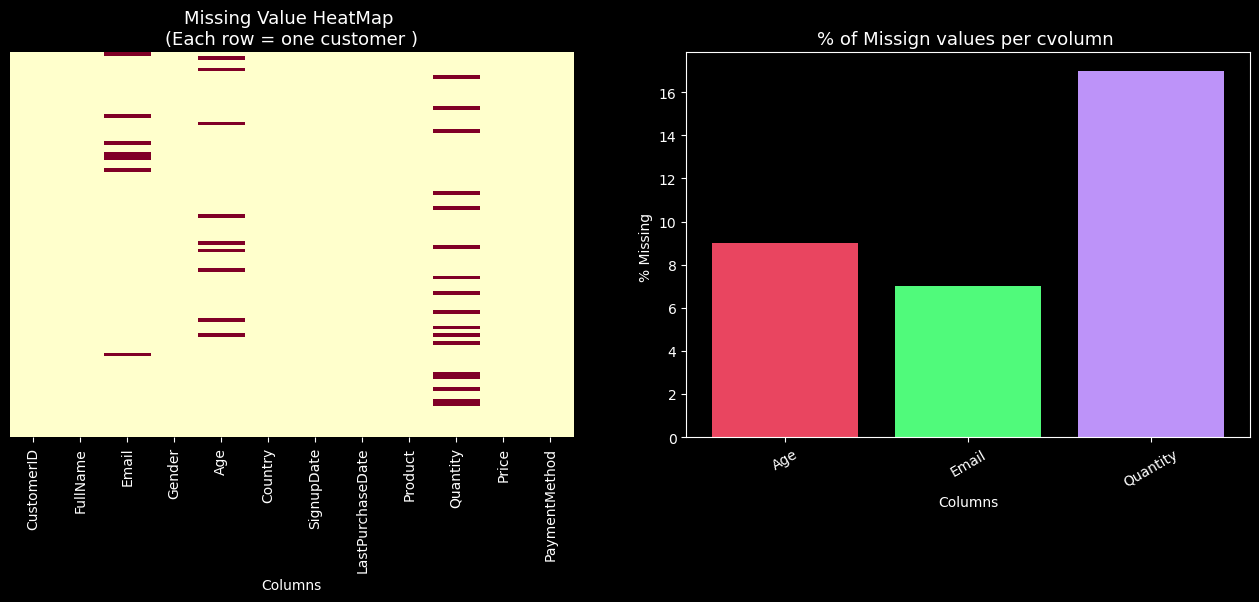

In [17]:
## Visuallize Missing values -> Heat map 
## heat map turns true / false into colors 
## this give you the bird eye view of where the data is absent 


fig , axes = plt.subplots(1,2,figsize=(16, 5))
## VHart for heat map 
sns.heatmap(
    df.isnull(),
    ax= axes[0],
    cbar = False, # no volor bar as no needed for tre / fasle 
    yticklabels=False, # hide row numbers 
    cmap='YlOrRd'
)

axes[0].set_title("Missing Value HeatMap \n(Each row = one customer )", color ='white',fontsize=13)
axes[0].set_xlabel('Columns',color='white')

## bar chart for missing 
cols_with_missing = missing_report[missing_report['Missing Count']>0]
axes[1].bar(cols_with_missing.index, # x-azis column name 
            cols_with_missing['Missing % '] ,# y-axis column name 
            color = ['#e94560','#50fa7b','#bd93f9']
    
)

axes[1].set_title('% of Missign values per cvolumn ',color ='white',fontsize =13)
axes[1].set_xlabel('Columns',color='white')
axes[1].set_ylabel('% Missing ',color ='white')
axes[1].tick_params(axis ='x',rotation= 30,color='white')
axes[1].tick_params(axis='y',color='white')

for i , v in enumerate(cols_with_missing['Missing %']):
    axes[1].text(i, v+0.5 ,f'{v}%', ha ='center', color = 'white', fontsize = 10)
    
    
plt.tight_layout() 
plt.show() 
print("Missing Value Charts .")


